In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyfea import frame, elementInfo
import importlib

importlib.reload(frame)
importlib.reload(elementInfo)

<module 'pyfea.elementInfo' from 'c:\\Users\\jackp_9\\OneDrive - University of Canterbury\\Documents\\ENME302\\5 Labs\\pyfea\\elementInfo.py'>

# Problem 2 2022
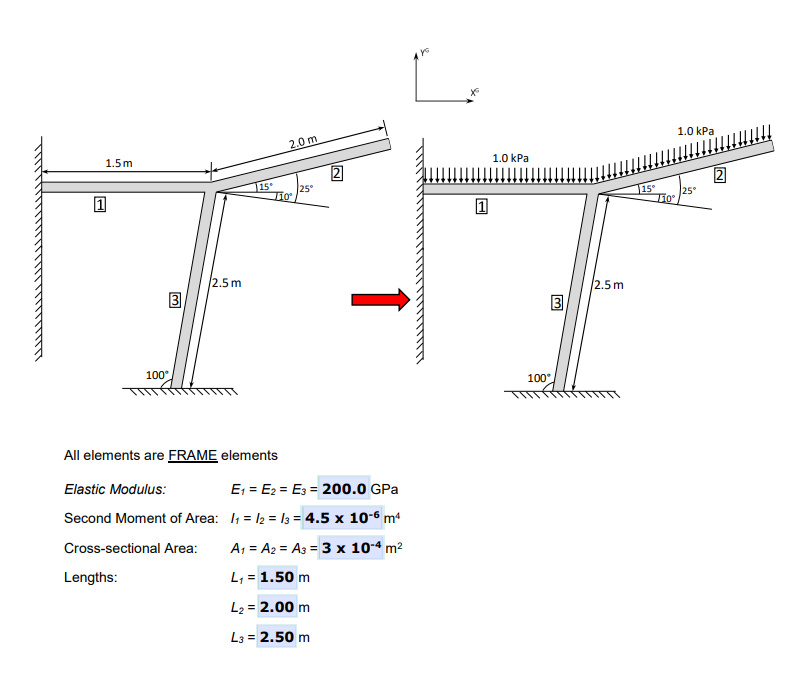

In [1]:
# Constants
E_1 = 200e9
E_2 = 200e9
E_3 = 200e9

L_1 = 1.5
L_2 = 2 
L_3 = 2.5

area_1 = 3e-4
area_2 = 3e-4
area_3 = 3e-4

I_1 = 4.5e-6
I_2 = 4.5e-6
I_3 = 4.5e-6

angle_1 = 0
angle_2 = 15
angle_3 = 80

In [3]:
# Create elements
k_1 = frame.local_frame(E_1, I_1, area_1, L_1)
k_2 = frame.local_frame(E_2, I_2, area_2, L_2)
k_3 = frame.local_frame(E_3, I_3, area_3, L_3)

Khat_1, lambda_1 = frame.global_frame(k_1, angle_1)
Khat_2, lambda_2 = frame.global_frame(k_2, angle_2)
Khat_3, lambda_3 = frame.global_frame(k_3, angle_3)

In [4]:
# Assemble
A1 = np.array([[0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0]])

A2 = np.array([[1, 0, 0, 0, 0, 0],
               [0, 1, 0, 0, 0, 0],
               [0, 0, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1]])

A3 = np.array([[0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0]])

KG_1 = frame.assemble_frame(Khat_1, A1)
KG_2 = frame.assemble_frame(Khat_2, A2)
KG_3 = frame.assemble_frame(Khat_3, A3)

KG = KG_1 + KG_2 + KG_3

In [11]:
# Find forces
Q_nodal = np.array([[0],
              [0],
              [0],
              [0],
              [0],
              [0]])

Q_UDL_1, F_UDL_1, f_UDL_1 = frame.find_UDL(L_1, -7.5e3, lambda_1, A1)
Q_UDL_2, F_UDL_2, f_UDL_2 = frame.find_UDL(L_2, -10e3 * np.cos(np.deg2rad(angle_2)), lambda_2, A2)
Q_ADL_2, F_ADL_2, f_ADL_2 = frame.find_axial_UDL(L_2, -10e3 * np.sin(np.deg2rad(angle_2)), lambda_2, A2)
Q = Q_nodal + Q_UDL_1 + Q_UDL_2 + Q_ADL_2

In [12]:
# Find displacements
q = np.linalg.solve(KG, Q)
print(q)

[[ 0.00038665]
 [-0.00152958]
 [-0.00576608]
 [ 0.00892698]
 [-0.0334024 ]
 [-0.02007609]]


In [13]:
# Find element information
f_1, d_1 = elementInfo.findLocal(k_1, A1, lambda_1, q)
f_2, d_2 = elementInfo.findLocal(k_2, A2, lambda_2, q)
f_3, d_3 = elementInfo.findLocal(k_3, A3, lambda_3, q)

# Find global force and displacement vectors
F_1, D_1 = elementInfo.findGlobal(Khat_1, A1, q)
F_2, D_2 = elementInfo.findGlobal(Khat_2, A2, q)
F_3, D_3 = elementInfo.findGlobal(Khat_3, A3, q)

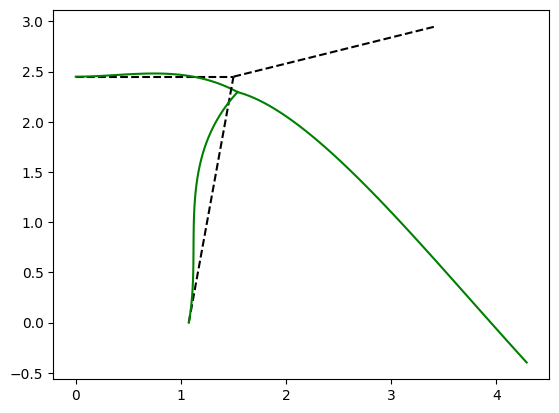

In [14]:
# Plot element
frame.plot_deflected_frame(0, L_3*0.98, L_1, L_3*0.98, d_1, disp_scale=100)
frame.plot_deflected_frame(L_1, L_3*0.98, L_1 + L_2 * 0.96, L_3*0.98+L_2*0.25, d_2, disp_scale=100)
frame.plot_deflected_frame(L_1-L_3*0.17, 0, L_1, L_3*0.98, d_3, disp_scale=100)

In [15]:
# find stresses
strain_1 = elementInfo.findFrameStrain(d_1, L_1)
stress_1 = elementInfo.findFrameStress(E_1, d_1, L_1)

strain_2 = elementInfo.findFrameStrain(d_2, L_2)
stress_2 = elementInfo.findFrameStress(E_2, d_2, L_2)

strain_3 = elementInfo.findFrameStrain(d_3, L_3)
stress_3 = elementInfo.findFrameStress(E_3, d_3, L_3)